<a href="https://colab.research.google.com/github/SalikFillah/Sentiment-Algorithm/blob/main/Twitter%20WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Algorithm
### with social media twitter using "snscrape" package

In [2]:
!pip install snscrape
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Advance Search
query = "ferdy sambo"
tweets = []
limit = 500

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

  if len(tweets) == limit:
    break
  else :
    tweets.append([tweet.date, tweet.user.username, tweet.content])

<ipython-input-3-ffdfb570c1ad>:14: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content])


In [4]:
df = pd.DataFrame(tweets, columns=['Tanggal','Pengguna','Tweet'])
df

,Tanggal,Pengguna,Tweet
0,2023-02-13 14:51:36+00:00,RiyaniAnisma,"@Miduk17 Ferdy Sambo, kau dihukum mati krn dia..."
1,2023-02-13 14:51:15+00:00,lawjusticeco,"Ferdy Sambo Divonis Hukuman Mati, Ibu Brigadir..."
2,2023-02-13 14:50:57+00:00,rifaldy_chally,Kasus Ferdy Sambo begitu menyita perhatian emo...
3,2023-02-13 14:50:32+00:00,shvlast,sedih si liat orang bersukacita Ferdy Sambo hu...
4,2023-02-13 14:50:32+00:00,polmaroy,selain cerita Ferdy Sambo https://t.co/frxaZTN...
...,...,...,...
495,2023-02-13 13:14:51+00:00,triwahyuutama15,Liat pengacara Ferdy Sambo sama Putri Candrawa...
496,2023-02-13 13:14:19+00:00,OposisiCerdas,"Setelah Ferdy Sambo Divonis Mati, Kini Giliran..."
497,2023-02-13 13:14:06+00:00,pikiran_rakyat,BREAKING NEWS: Putri Candrawathi Divonis 20 Ta...
498,2023-02-13 13:14:02+00:00,idtodayco,Vonis Ferdy Sambo Bukti Keberhasilan Kolaboras...


### Preprocessing
clean up the contents of the tweet in such a way as to make it easier to read

In [5]:
!pip install unidecode
from unidecode import unidecode
from html import unescape
from tqdm import tqdm
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.9 MB/s eta 0:00:00


In [6]:
def cleanText(txt):
# Mengubah huruf kapital dan menangani spasi
    docx = unidecode(unescape(txt.lower().strip()))
# Menghilangkan URL
    docx = re.sub(r'(\w+:\/\/\S+)',' ', docx)
# Menghilangkan Hashtag
    docx = re.sub(r'#(\w+)',' ',docx)
# Menghilangkan User
    docx = re.sub(r'(@[A-Za-z0-9]+)',' ',docx)
# Menghilangkan Simbol
    docx = re.sub(r'[^\w]',' ', docx)
# Menghilangkan Underscore
    docx = re.sub(r'[_]',' ',docx)
    return docx

In [7]:
df['clean_tweet'] = ''
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_tweet'] = cleanText(post.Tweet)

500it [00:00, 2356.16it/s]


In [8]:
df

,Tanggal,Pengguna,Tweet,clean_tweet
0,2023-02-13 14:51:36+00:00,RiyaniAnisma,"@Miduk17 Ferdy Sambo, kau dihukum mati krn dia...",ferdy sambo kau dihukum mati krn dianggap m...
1,2023-02-13 14:51:15+00:00,lawjusticeco,"Ferdy Sambo Divonis Hukuman Mati, Ibu Brigadir...",ferdy sambo divonis hukuman mati ibu brigadir...
2,2023-02-13 14:50:57+00:00,rifaldy_chally,Kasus Ferdy Sambo begitu menyita perhatian emo...,kasus ferdy sambo begitu menyita perhatian emo...
3,2023-02-13 14:50:32+00:00,shvlast,sedih si liat orang bersukacita Ferdy Sambo hu...,sedih si liat orang bersukacita ferdy sambo hu...
4,2023-02-13 14:50:32+00:00,polmaroy,selain cerita Ferdy Sambo https://t.co/frxaZTN...,selain cerita ferdy sambo ada juga cerita pu...
...,...,...,...,...
495,2023-02-13 13:14:51+00:00,triwahyuutama15,Liat pengacara Ferdy Sambo sama Putri Candrawa...,liat pengacara ferdy sambo sama putri candrawa...
496,2023-02-13 13:14:19+00:00,OposisiCerdas,"Setelah Ferdy Sambo Divonis Mati, Kini Giliran...",setelah ferdy sambo divonis mati kini giliran...
497,2023-02-13 13:14:06+00:00,pikiran_rakyat,BREAKING NEWS: Putri Candrawathi Divonis 20 Ta...,breaking news putri candrawathi divonis 20 ta...
498,2023-02-13 13:14:02+00:00,idtodayco,Vonis Ferdy Sambo Bukti Keberhasilan Kolaboras...,vonis ferdy sambo bukti keberhasilan kolaboras...


### Word Cloud
displays some words that often appear in the contents of the tweet

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

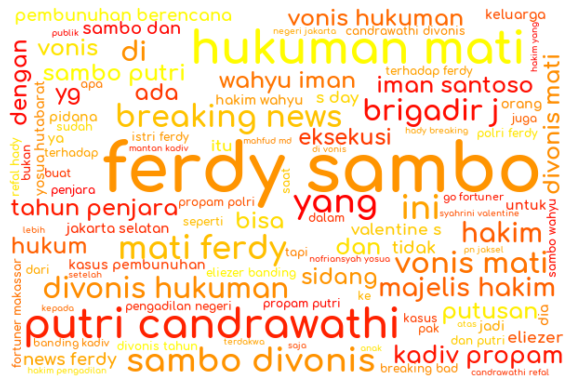

In [11]:
# Melihat Plot WordCloud 
allWords = ' '.join( [twts for twts in df['clean_tweet']] )
font = '/Comfortaa-Bold.ttf'
wordCloud = WordCloud(background_color = "white",
                      font_path = font,
                      width = 600,
                      height = 400,
                      max_words = 100,
                      colormap = 'autumn_r').generate(allWords)
plt.figure(figsize = (10,10))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()